In [50]:
import pandas as pd


In [51]:
train = pd.read_csv("./bike-sharing-demand/train.csv")
print(train.shape)
train.head()

# season은 봄여름가을겨울이 1234임
# holiday는 공휴일 여부 1은 공휴일 (주말은 공휴일이 아님 주말은 제외)
# workingday는 공휴일과 주말을 뺀 날
# weather .... kaggle에 가면 각 컬럼에 대한 설명이 있음
# temp 기온
# atemp 체감온도
# humidity
# windspeed     -무풍(0)이 말이 되는가? : 빈값을 0으로 넣었거나 여러 이유가 있음
# casual, registered, count 이 3개가 label
# casual + registered = count임
# casual은 비 정기권 사용자, registered는 정기권 사용자
# 따라서 count가 전체 사용자이므로 이것만 제출하면 됨
# 그러나 이 casual과 registered는 서로 다른 양상을 띌 것이므로 이들을 나눠서 예측하는게 좋겠지

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [52]:
test = pd.read_csv("./bike-sharing-demand/test.csv")
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Exploaratory Data Analysis (EDA)

데이터를 탐험하는 건 맞는데 크게 2가지

데이터를 직접 탐험하고, 데이터를 가공하면 머신러닝 알고리즘 성능(예측성능)이 좋아질까

즉, 가설검증예측에서 가설을 세우는 부분임

따라서 이 부분이 정말 데이터 분석에 중요한 역량임-사고력과 통찰력이 필요하다능

이거 잘하면 성능이 정말 좋아짐

이 분야는 가이드는 있지만 딱 이거다라 정해진게 없음

데이터는 똑같을 수 없음->데이터마다 처리해야할 것들이 다 다름, 특성이 다 다름

심지에 시간지남에 따라 다름

따라서 이 분야는 통찰력과 ""(그 분야의)전문지식""의 싸움임

통찰력은 ""경험""으로 얻어지겠지

이 경험은 인턴이나 경진대회 등등을 통해서 쌓을 수 있음

### kaggle의 notebook에서 잘하는 사람들의 방식을 얻을 수 있음 이걸 참고하자
#### 관련분야의 캐글 프로젝트에서 보면 되겠지


중요할 것 같은 컬럼들부터 하나씩 따지는겨

->통찰->연관관계를 찾자! or 모순점을 찾자 or 새로운 패턴을 찾자 or 통념이나 상식을 뒷받침하는 근거찾자

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt  # matplotlib에서 몇가지 옵션도 쓸 것이라 임포트 함
%matplotlib inline

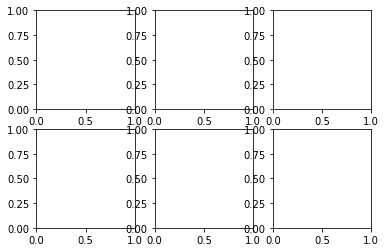

In [83]:
figure,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)  # plt.subplots ->화면 분할해줌 =>여기선 figure을 6개로 분할함+반환도 함
                                                                    # figure는 전체화면임(각 cell마다 갖겠지)
                                                                    # figure 변수에 figure 핸들이 담김
                                                                    # 그 뒤에 한덩이로 묶어놓은 ax들에 각 구역이 들어감
                                                                    # 나타낼 한 줄마다 소괄호로 묶어야함

#figure.set_size_inches(18,8)                                        # 이figure변수이용해 사이즈 조정

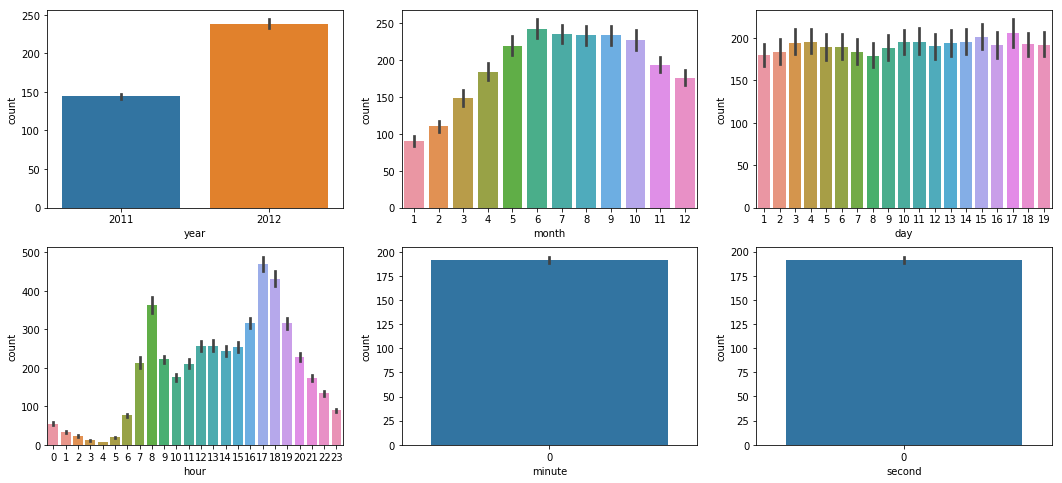

In [82]:
# 날짜 관련된 정보 분석해보자-> 정보가 일단 많으니까

figure,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)  # plt.subplots ->화면 분할해줌 =>여기선 figure을 6개로 분할함+반환도 함
                                                                    # figure는 전체화면임(각 cell마다 갖겠지)
                                                                    # figure 변수에 figure 핸들이 담김
                                                                    # 그 뒤에 한덩이로 묶어놓은 ax들에 각 구역이 들어감
                                                                    # 나타낼 한 줄마다 소괄호로 묶어야함

figure.set_size_inches(18,8)                                        # 이figure변수이용해 사이즈 조정

sns.barplot(data=train,x='year',y='count',ax=ax1)                   # 각 그래프마다 ax 지정해줌
sns.barplot(data=train,x='month',y='count',ax=ax2)
sns.barplot(data=train,x='day',y='count',ax=ax3)
sns.barplot(data=train,x='hour',y='count',ax=ax4)
sns.barplot(data=train,x='minute',y='count',ax=ax5)
sns.barplot(data=train,x='second',y='count',ax=ax6)


## year는 별로 없음. 매출이 성장했다정도
## month에서 계절성이 있다고 추측, 
##   워싱턴시티는 6,7,8,9월에 여름이래
##    11월에 큰 낙폭
##     ***12월과 1월의 차이가 너무 큼.***
##      barplot은 월별평균임->2011년과 2012년의 평균임 
##      2011년 1월과 2012년 12월의 차이는 많이날 것임. 대여량이 그 동안 늘어나서 그랬을 수 있음 -> 이 양 극단이 반영된 것임.
##      반면 2011년 12월과 2012년 1월의 차이는 거의 안날 것
##    ***month 데이터가 머신러닝 알고리즘에 도움이 될까?***
##       위에서 봤듯이 단순히 월만 보고는 예측하면 안됨
##       년도도 같이 따져야함.
##      따라서 2011년1월, 2011년12월, 2012년 1월, 2012년 12월 따로 따져야함.
##       ->가설: month는 머신러닝에 방해가 될 것 같아 이대로 넣으면 month자체로만 따질테니까(계절성은 걍 season으로 할 수 있으니)
##      -> 검증: kaggle에 month빼고 minute second도 빼보자 도움이 안될껏같으니
##         (-> 어떻게 머신러닝돌렸을 때 성능좋아질지 나름 분석해서 가설을 세워야함 원래는!)
##       -> month만 뺐는데 순위 쥰내 오름 !!  데이터를 어케 넣을지가 쥰내 중요해용

## day 에서.. 19일까지 밖에 그래프에 없넹
## ->20일 부터는 test에 있음
##  day가 머신러닝에 도움이 되는건가?
##       전혀 도움이 안된다
##         왜냐면 20일 이후를 예측해야 하고, 고려하더라도 복잡도만 높이게됨->""다른 컬럼에 중요도가 낮아질 수 있음""
##               ->가설 : day가 도움 안될 것임.
##             score감소 -> 결국 의미가 없었음
##        보통은 day가 중요함. 그러나 지금은 의미 없음
##             20일 이후를 맞춰야 하기 때문에

## hour에서 ..
##  출퇴근 시간대에 이용량이 많음
##  ->위는 가설임. 실제로 확인하기 위해선 workingday에서도 확인해봐야함.
##  -> 또한 이때 registered가 더 많을 것 같으니 casual보다는 이것도 확인해바야함.
##  새벽 4시에 신뢰구간이 없음->데이터가 적어서 신뢰구간이 없는겨
##  낮 시간 대에는 casual이 많을 것이라 가설 지을 수 있음
##   -> 실제로 확인해 보면 registered가 더 많음, 압도적으로 registered가 casual보다 더 많음

## casual과 registered가 다른 패턴을 가질 가능성이 높음
## 따라서 각각 머신러닝 돌리고 두개를 더해서 count로 만들면 점수가 더 좋아질 것임.

## 더 분석하고 근거도 찾고 검증도 해봐야 한다.

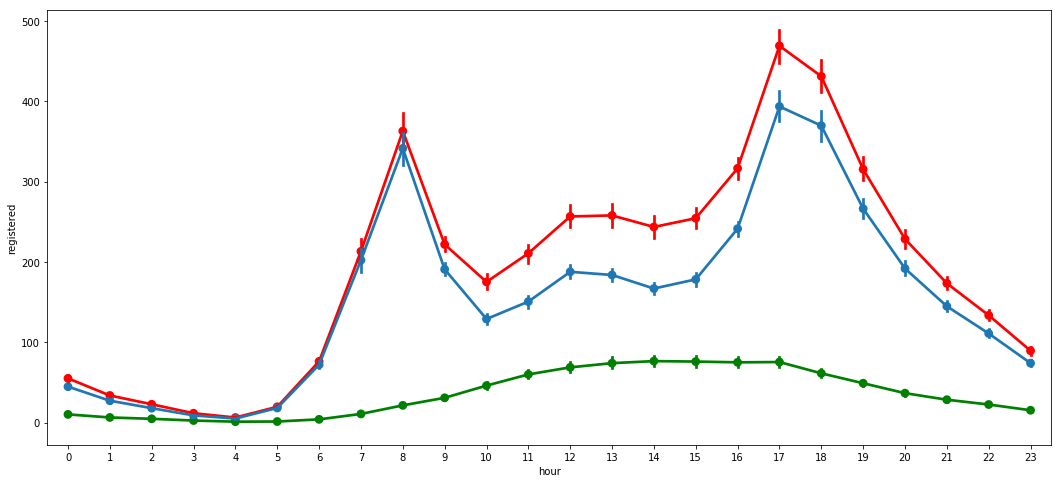

In [107]:
# 위의 결과를 토대로
# 년과 월을 합쳐서 생각하고
# hour는 casual과 registered를 나눠서 생각해볼 것임
plt.figure(figsize=(18,8))                  ### 아예 plt에 접근해서 사이즈를 조정 가능함

                                                ## sns는 범주넣기가 별로라서 색상을 지정해서 구분해 줄 것임
sns.pointplot(data=train, x='hour',y='count', color='red')    ##x축과 y축 범위가 비슷한 것끼리 겹치는게 좋음
sns.pointplot(data=train, x='hour',y='casual',color='green')   ## 지금 x축이 같으니 3개 나란히 실행하면 한 figure안에 나오게 됨
sns.pointplot(data=train, x='hour',y='registered')

## 결과를 보면 registered가 훨씬 더 많음. + casual과 registered가 다른 패턴을 보이는게 확인 됐지.
##  따라서 이 둘을 따로 예측하는게 훨씬 좋을 것이다.

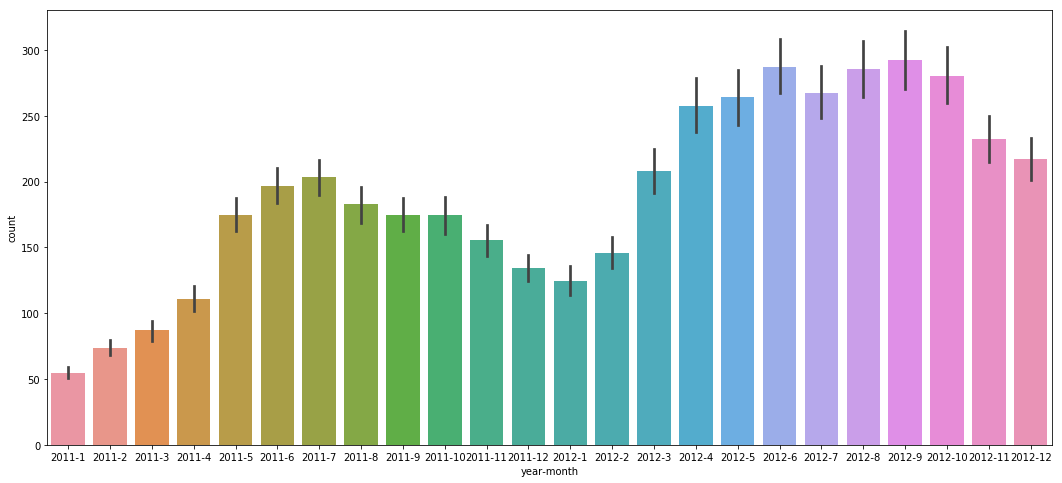

In [117]:
## 위에는 casual과 registered를 나눠봤으니 
## 이제는 년과 월을 붙여서 봐보자.

###  내용을 preprocessing에 잘라서 붙여넣었음. (년과 월을 붙여만듦)

plt.figure(figsize=(18,8))  ## 참고로 이 사이즈는 비율임
sns.barplot(data=train,x='year-month',y='count')

## 참고로 season은 사람이 지정한 것임
## 그래서 사람이 지정한 것은 조심해야함. season을 재구성할 수 있음 여름을 456월에서 567월 정도로
##   실제로 시즌을 재조정하면 성능이 올라감
## 년월을 이대로 넣을 순 없음. 인코딩하든가 다른식으로 숫자로 만들어야함.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,year-month
154,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.0028,2011,1,26,16,0,0,2011-1
3248,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,12.9980,2012,1,21,1,0,0,2012-1


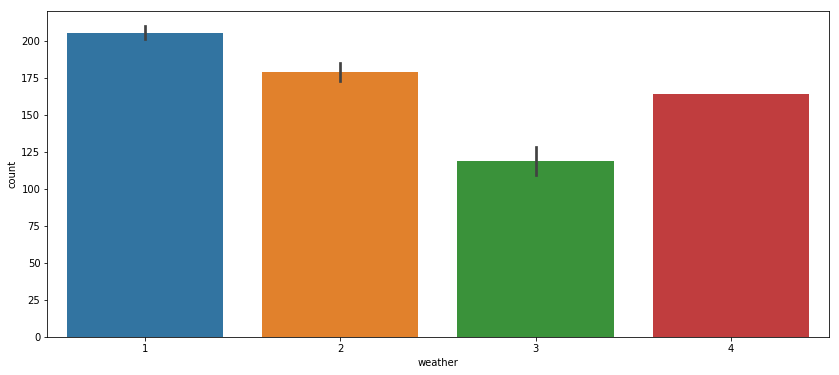

In [123]:
# 다른 column볼 때 참고할 수 있는기능이 
train.corr()   # 각 컬럼간 상관관계를 보여줌. 물론 이는 선형관계를 가정하기 때문에 절대적임은 아님

## 날씨를 살펴보자

plt.figure(figsize=(14,6))
sns.barplot(data=train,x='weather',y='count')

# weather은 정성적으로 정해진 것임.
# 4번으로 갈 수록 날씨가 안좋은데
# 4번에 갑자기 대여량이 높아짐.
# 4번에 신뢰구간이 없으므로 샘플량이 적은 것이고 따라서 아마 운이 좋아서 이랬을 것 같은데
# 정확하게 보려면 4일 때를 조사해보자.

train[train['weather']==4] ## 데이터가 1개가 나옴. 
     ### 절대로 데이터를 볼 때 수치 하나만 보는것은 굉장히 나쁘다.
    ### 여러 컬럼들을 같이 봐보자.
    ### 시간대는 퇴근시간임. 시즌은 봄, 워킹대이이니 퇴근시간이 맞음, 바람속력도 0을 제외하곤 낮은 숫자라 안쎈데
    ##  -> 가능성은 우박임 (제대로 확인하려면 날짜로 미국 기상청등에 검색해야함.)
    ## 이걸 놔둬야 할까 (우박이면 놔둬야 하겠지. 그래야 머신러닝이 그 때 정하지.)
    ## weather가 4쪽일 수록 대여량이 낮아져야 하는데 높았으니 이게 머신러닝을 헷갈리게 할 수 있음
    ##  우리는 이 것을 2또는 3으로 놔둘 수도 있음.
    ##   주변 데이터와 같이 보면 됨. ->주변 1시간 전후로 날씨가 괜찮으면 그 날씨에 맞춰줘도 됨.
    ##  또 다른 가설로는 날씨가 갑자기 안좋아져서 도로상황이 너무 안좋아서 자전거를 타거나 그럴 수도 있지. 
    ## 여러 데이터와 자료수집을 통해서 이를 어떻게 처리할지 정해야함.
    ## 뭐 물론 삭제할 수도 있음. 그러나 weather때문에 다른 정보를 없애야 하니 정보가 아까울 수 있음. 너무 안좋으면 없애는게 맞음.
#### 그리고 ade를 test도 진행해봐야함.

test[test['weather']==4]    ## 역시도 1월에 웨더가 4이네. 뭐 weather를 어케할지는 역시 주변을 살펴보고 train에서 어케할지 결정하세여.


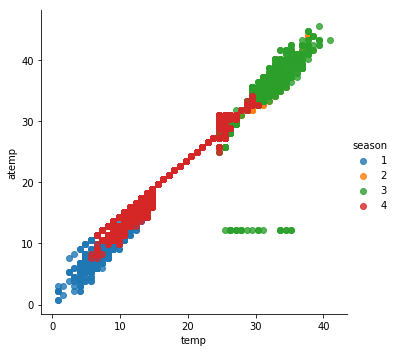

In [129]:
## lmplot은 거의 유일하게 plt에서 사이즈 조정이 안되고 자체적으로 기능이 있음
sns.lmplot(data=train,x='temp',y='atemp',hue='season',height=5,aspect=1,fit_reg=False) ## height와 aspect로 사이즈를 조정해야함.


### temp와 atemp의 특이점   ==> 이런 데이터는 따로 꼭 확인해보기!!

### -> 오른쪽 아래에 튀는 데이터  -> temp>20 & atemp<20 일 때 검색해서 알아보기 => 결론적으로 하루 데이터였음
###        ->데이터가 잘못 기록됐다 생각할 수 있음(주변 데이터도 살펴보기 바람.)
### -> 정 중앙에 너무 정비례인것도 이상함.

## hue에 season을 넣어놓자.
## 눈에 띄는 건 4(겨울) => 너무 범위가 넓음 온도범위가.
##    -> 안에 잘못된 데이터가 있거나 season의 정의가 잘못된 것임. -> season을 잘 재정의하면 좋을 것 같다.

## hue에 day를 넣어보면 같은 날임. -> 년과 월 까진 모르겠지만 같은 날일 확률이 높겠지.


## 오른쪽 아래 데이터를 어케하면 좋을까?
## 삭제할 수도 있지만 다른 정보가 아까울 수 있음
## 저 점들을 올려볼 수도 있음 (temp와 atemp가 선형관계이기 때문에 가능함.)

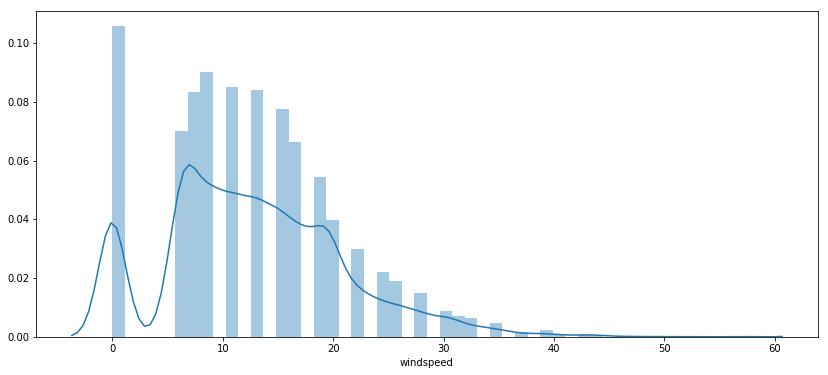

In [131]:
plt.figure(figsize=(14,6))
sns.distplot(train['windspeed'])

## 0이 많음 ->측정장비가 이상하거나 비어있는 값일 수 있음.
##  왜 0하고 6.XX(0에서 가장 가까운 오른쪽) 사이 값은 없을까
##   왜 값들이 이산화되어있을까 -> 1시간마다 측정해서 그럴수도 있고, 반올림을 했을 수도 있지
### -> 하나의 가설: 0은 값이 너무 작아서 측정되지 않았을 수도 있음.

## 데이터를 직접 엑셀로 살펴보면...
##  0 제외 가장 작은 거가 6.0032 
## 그리고 0 주변은 거의 대부분 6.0032가(혹은 작은 값) 있음 -> 값이 너무 작아서 측정되지 않았을 가능성이 높음.

## 이 0을 어케 처리해야 머신러닝이 좋아할까
## ->1. 값을 조금씩 퍼트려주거나    (이런 기능등은 판다스에 많으니까 판다스 이용하세연)
## ->2. 다 6.0032로 만들어주거나
##  등등  (뭐든지 결과가 좋은걸로 바꿔주면 되겠찌)
## 혹은 windspeed를 예측해보는 머신러닝을 돌릴 수 있지.

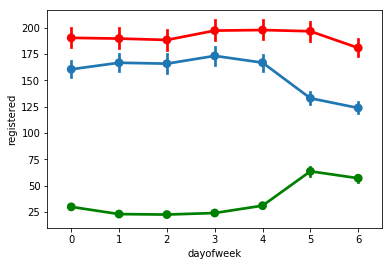

In [145]:
sns.pointplot(data=train, x='dayofweek',y='count',color='red')   
sns.pointplot(data=train, x='dayofweek',y='casual',color='green')
sns.pointplot(data=train, x='dayofweek',y='registered')

## 요일은 분명히 casual과 registered에대해 다른 영향을 끼친다.


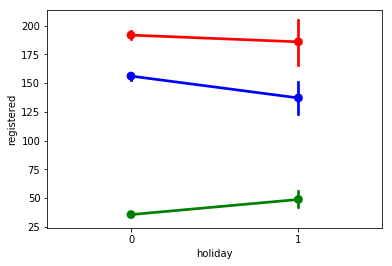

In [155]:
# 그럼 workingday를 제외한 날과 workingday와의 관계로 나눠보면?
sns.pointplot(data=train, x='holiday',y='count',color='red')  
sns.pointplot(data=train, x='holiday',y='casual',color='green')  
sns.pointplot(data=train, x='holiday',y='registered',color='blue')

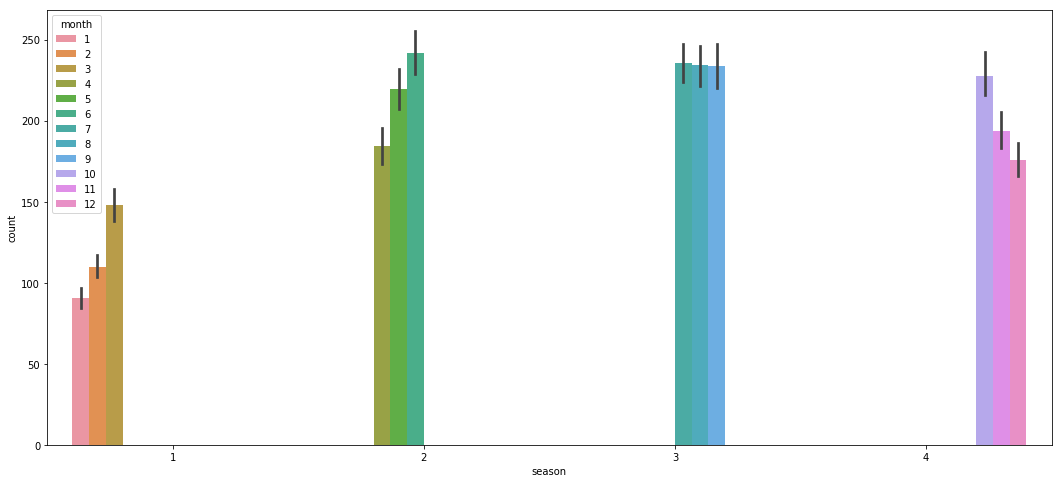

In [195]:
# season이 몇월로 되어있는지 함 보자.
plt.figure(figsize=(18,8))
sns.barplot(data=train, x='season',y='count',hue='month')

# season을 사용한다면 123,456,789,101112가 아니라, 2 3 4/5 6 7/8 9 10/11 12 1 가 낫겠어. 월별 추이를 봤을 때


In [269]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,year-month(2012-3),year-month(2012-4),year-month(2012-5),year-month(2012-6),year-month(2012-7),year-month(2012-8),year-month(2012-9),year-month(2012-10),year-month(2012-11),year-month(2012-12)
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,False,False,False,False,False,False,False,False,False,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,False,False,False,False,False,False,False,False,False,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,False,False,False,False,False,False,False,False,False,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,False,False,False,False,False,False,False,False,False,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,False,False,False,False,False,False,False,False,False,False
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,...,False,False,False,False,False,False,False,False,False,False
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,...,False,False,False,False,False,False,False,False,False,False
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,...,False,False,False,False,False,False,False,False,False,False
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,...,False,False,False,False,False,False,False,False,False,False
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,...,False,False,False,False,False,False,False,False,False,False


In [54]:
train.isnull().sum() #빈 값은 없지만 비어있는 것과 유사한 것은 있다(windspeed의 0이라든가)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [55]:
test.info() # 여러 정보가 나온데

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [56]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## Preprocessing

In [57]:
# datetime을 제외하곤 다 숫자
# datetime을 쪼갤 것임-년,월,일,시,분,초 로

In [255]:
train['datetime']=pd.to_datetime(train['datetime']) # 이러면 datetime형식으로 바뀜     지금은 원본 유지 안하고 덮어 씌울 꺼임
                                                            ## 날짜는 원본 유지안하는 거의 유일한 경우라 할 수 있나봐
train['year']=train['datetime'].dt.year  #.dt.을 통해 datetime의 기능을 쓸 수 있음
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek']=train['datetime'].dt.dayofweek  ## 0:Mon, 6:Sun

## 년과 월을 걍 더하면 겹치는게 생기니, year에 100을 곱하고 month를 더해서 새로운 데이터를 만들던지
## 소숫점 이하로 월을 붙이든지, 문자열로 바꾸든
## 어떤 방식으로든 알아보기 쉽고 겹치는 것이 없도록 만들자

     # \를 이용하면 여러줄에 걸쳐 한줄을 나눠쓸 수 있음 코드를
train['year-month'] = train['year'].astype(str)+"-"+train['month'].astype(str)    ## astype을 이용해서 타입을 바꿀 수 있나봄.
train['year-month'] = train['year']*100+train['month']

train['normalweekend']=(train['workingday']==0) & (train['holiday']==0)

## season을 재정의하자. 2,3,4/5,6,7/8,9,10/11,12,1
                       # 봄    여름   가을  겨울



# train.columns   # 이 코드로 컬럼이 어떤게 있는지 확인가능-> 제대로 컬럼 만들어졌는지 확인
cols=['datetime', 'year', 'month', 'day' ,'hour', 'minute', 'second']
train[cols].head()




,datetime,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


In [256]:
test['datetime']=pd.to_datetime(test['datetime']) # 이러면 datetime형식으로 바뀜     지금은 원본 유지 안하고 덮어 씌울 꺼임
                                                            ## 날짜는 원본 유지안하는 거의 유일한 경우라 할 수 있나봐
test['year']=test['datetime'].dt.year  #.dt.을 통해 datetime의 기능을 쓸 수 있음
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek']=test['datetime'].dt.dayofweek  ## 0:Mon, 6:Sun

## 년과 월을 걍 더하면 겹치는게 생기니, year에 100을 곱하고 month를 더해서 새로운 데이터를 만들던지
## 소숫점 이하로 월을 붙이든지, 문자열로 바꾸든
## 어떤 방식으로든 알아보기 쉽고 겹치는 것이 없도록 만들자

     # \를 이용하면 여러줄에 걸쳐 한줄을 나눠쓸 수 있음 코드를
test['year-month'] = test['year'].astype(str)+"-"+test['month'].astype(str)    ## astype을 이용해서 타입을 바꿀 수 있나봄.
test['year-month'] = test['year']*100+test['month']

test['normalweekend']=(test['workingday']==0) & (test['holiday']==0)

## season을 재정의하자. 2,3,4/5,6,7/8,9,10/11,12,1
                       # 봄    여름   가을  겨울



# test.columns   # 이 코드로 컬럼이 어떤게 있는지 확인가능-> 제대로 컬럼 만들어졌는지 확인
cols=['datetime', 'year', 'month', 'day' ,'hour', 'minute', 'second']
test[cols].head()




,datetime,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0


#### 단축키 f를 눌르면 간단하게 코드의 단어 쉽게 바꿀 수 있음 밑에처럼 train을 test로 한방에 바꿀 수 있음!

## *** find옆에 화살표 ""절대"" 누르지 말기 ->누르면 주피터 전체에서 바뀜

### one-hot-encoding

- 문자열인 카테고리 컬럼 사용할 때 -> 여러 컬럼으로 나눠서 그중 하나만 True되도록 하기
- 걍 카테고리 컬럼 (그냥 하는 것 보다 더 좋아질 여지가 있다. 머신러닝이 동작하는게 살짝 달라진데)->season과 weather는 꼭 해보장.

*컬럼이 많이 생기기 때문에 무조건 더 좋아지진 않고 시간이 더 오래걸리 수 있지만 한번 해보자*

In [257]:
# train['year-month(2011-1)']=train['year-month'] == 201101
# train['year-month(2011-2)']=train['year-month'] == 201102
# train['year-month(2011-3)']=train['year-month'] == 201103
# train['year-month(2011-4)']=train['year-month'] == 201104
# train['year-month(2011-5)']=train['year-month'] == 201105
# train['year-month(2011-6)']=train['year-month'] == 201106
# train['year-month(2011-7)']=train['year-month'] == 201107
# train['year-month(2011-8)']=train['year-month'] == 201108
# train['year-month(2011-9)']=train['year-month'] == 201109
# train['year-month(2011-10)']=train['year-month'] == 201110
# train['year-month(2011-11)']=train['year-month'] == 201112
# train['year-month(2011-12)']=train['year-month'] == 201112
# train['year-month(2012-1)']=train['year-month'] == 201201
# train['year-month(2012-2)']=train['year-month'] == 201202
# train['year-month(2012-3)']=train['year-month'] == 201203
# train['year-month(2012-4)']=train['year-month'] == 201204
# train['year-month(2012-5)']=train['year-month'] == 201205
# train['year-month(2012-6)']=train['year-month'] == 201206
# train['year-month(2012-7)']=train['year-month'] == 201207
# train['year-month(2012-8)']=train['year-month'] == 201208
# train['year-month(2012-9)']=train['year-month'] == 201209
# train['year-month(2012-10)']=train['year-month'] == 201210
# train['year-month(2012-11)']=train['year-month'] == 201212
# train['year-month(2012-12)']=train['year-month'] == 201212


# cols=['year-month',
#       'year-month(2011-1)','year-month(2011-2)','year-month(2011-3)','year-month(2011-4)',
#       'year-month(2011-5)','year-month(2011-6)','year-month(2011-7)','year-month(2011-8)',
#       'year-month(2011-9)','year-month(2011-10)','year-month(2011-11)','year-month(2011-12)',
#       'year-month(2012-1)','year-month(2012-2)','year-month(2012-3)','year-month(2012-4)',
#       'year-month(2012-5)','year-month(2012-6)','year-month(2012-7)','year-month(2012-8)',
#       'year-month(2012-9)','year-month(2012-10)','year-month(2012-11)','year-month(2012-12)'
#      ]
# train[cols].head() ## 정확히하려면 이걸 11년 12년 모든 month를 다 해줘야함.

########### 이거 하니까 쥰내 안좋아짐ㄴ

# train['weather(1)']=train['weather']==1
# train['weather(2)']=train['weather']==2
# train['weather(3)']=train['weather']==3
# train['weather(4)']=train['weather']==4
# cols=['weather(1)','weather(2)','weather(3)','weather(4)']
# print(train[cols].shape)
# train[cols].head()

## weather을 one-hot-encoding하니 결과가 더 나빠졌음

## Train

In [258]:
train.columns ## 컬럼의 리스트가 나오니 이걸 복사해서 갖다 쓰면 댐

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'year-month',
       'year-month(2011-1)', 'year-month(2011-2)', 'dayofweek',
       'normalweekend', 'weather(1)', 'weather(2)', 'weather(3)', 'weather(4)',
       'year-month(2011-3)', 'year-month(2011-4)', 'year-month(2011-5)',
       'year-month(2011-6)', 'year-month(2011-7)', 'year-month(2011-8)',
       'year-month(2011-9)', 'year-month(2011-10)', 'year-month(2011-11)',
       'year-month(2011-12)', 'year-month(2012-1)', 'year-month(2012-2)',
       'year-month(2012-3)', 'year-month(2012-4)', 'year-month(2012-5)',
       'year-month(2012-6)', 'year-month(2012-7)', 'year-month(2012-8)',
       'year-month(2012-9)', 'year-month(2012-10)', 'year-month(2012-11)',
       'year-month(2012-12)'],
      dtype='object')

In [259]:
## 여기서 뺄 것만 빼주면 됩니당 -> datetime은 문자니까 지워줍니다 ->숫자로 바꿨으니
                                # casual, registered, count는 label이니까 빼주자 지금은 features 만드니까
features=['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed',
       'year-month', 'hour','dayofweek','normalweekend'] 

print(len(features))
features

12


['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year-month',
 'hour',
 'dayofweek',
 'normalweekend']

In [260]:
X_train=train[features]
print(X_train.shape)
X_train.head()

(10886, 12)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year-month,hour,dayofweek,normalweekend
0,1,0,0,1,9.84,14.395,81,0.0,201101,0,5,True
1,1,0,0,1,9.02,13.635,80,0.0,201101,1,5,True
2,1,0,0,1,9.02,13.635,80,0.0,201101,2,5,True
3,1,0,0,1,9.84,14.395,75,0.0,201101,3,5,True
4,1,0,0,1,9.84,14.395,75,0.0,201101,4,5,True


In [261]:
X_test=test[features]
print(X_test.shape)
X_test.head()

(6493, 12)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year-month,hour,dayofweek,normalweekend
0,1,0,1,1,10.66,11.365,56,26.0027,201101,0,3,False
1,1,0,1,1,10.66,13.635,56,0.0000,201101,1,3,False
2,1,0,1,1,10.66,13.635,56,0.0000,201101,2,3,False
3,1,0,1,1,10.66,12.880,56,11.0014,201101,3,3,False
4,1,0,1,1,10.66,12.880,56,11.0014,201101,4,3,False


In [262]:
##label = 'count'   이건 최종적으로 합치고 일단 casual과 registered로 나눠보자.
# y_train=train[label]
# print(y_train.shape)
# y_train.head()

label1='casual'
y_train1=train[label1]
print(y_train1.shape)
y_train1.head()

label2 = 'registered'
y_train2=train[label2]
print(y_train2.shape)
y_train2.head()

(10886,)
(10886,)


0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

## Model

DecisionTree는 스스로 가지를 치면서 스스로 분석하는 방식
->"의사결정나무"
->조건별로 가지를 치는겨
->변수를 이용해 규칙들의 집합을 마치 나무모양으로 형성하는 머신러닝모델.
->이해학 쉽고, 주로 분류모형에 쓰임
->중요하게 고려하는 조건부터 찾아감 (뭐가 더 중요한지는 스스로 찾음)
->자료구조에서의 트리구조라고 생각하면 됨

학습(fit)를 하면 decision tree는 우선 데이터의 features를 바탕으로 정답에 근접한 모든 조건(부등호로)을 만든다.
*타이타닉에서 Embarked를 분류할 때는 전처리과정에서 C냐S냐Q냐에 따라 각각 하나만 True되도록 만들면 됨*
->모든 조건을 만들고 가장 중요한 조건을 골라낸다.
중요한 조건 찾는 원리
->Gini impurity(지니"불순도")가 낮을 수록 좋은조건
->불순도는 한가지 종류만 있으면 불순도가 낮은거지
->불순도가 낮을 수록 원인이 확실한거니까..
->가장 균일하게 섞여있을 때(50%:50%) 불순도각 0.5로 가장 안좋음
->어떤 조건으로 가지쳤을 때 그 기준에 한쪽으로 쏠려있을수록 좋은거지
->근데 무조건 불순도만으로 따지면 안됨. 인원수가 적게 떨어진 예를들어 1명만 떨어지면 불순도가0이니까 이에 대한 가중치는 낮춰야겠지
->데이터의 크기에 따라서 가중평균을 구해줘야한데
->모든 조건에 대해 가중평균을 구하고 이에따라 가장 불순도가 낮은걸 가장 처음의 조건으로 만든다

위는 classification에 대한 것

regression은 불순도를 구하기 어렵->에러를 사용
지니 불순도를 구하는게 아니라 mse를 구해서 좋은 조건을 찾는다. mse가 가장 낮을것을 맨 처음조건으로 만들겠지 
->즉, 좋은 조건을 찾는 기준이 바뀌는것

Decesion Tree의 랜덤성은 모든 조건에 대해 하지않음. 랜덤으로 뽑아서 최적화해 나가는거래

--------------------------------------------
Random Forest (Decision Tree의 업그레이드 버젼)
-> 의사결정나무를 여러개 만드는겨
*머신러닝의 큰 3가지 : Random Forest, Boosting, Deep Learning*
랜덤포레스트는 Bagging(배깅)이라는 방식을 사용함->"복원추출로 샘플을 여러개 뽑는겨" =>여러 다양한 샘플이 가능하지
이후 각 샘플마다 Decision Tree를 하나씩 만듦
각 샘플의 Decision Tree의 결과의 과반수로 예측한다

장점: 
원리가 굉장히 간단하다, 
대부분 상황에서 DecisionTree보다 좋은 성능 보인다,  (데이터가 적고 안좋으면 안좋은성능보이는데, 이건 다른 것들에서도 비슷하니까)
실제로 자주쓴다

단점:
해석하기 어렵다 (왜 이런 결과가 나왔는지 파악하는게 어렵다->Decisoin Tree를 쥰내많이 만들어서)

Random Forest의 성능ㄴ이 Decision Tree보다 좋은 이유: 각 Decision Tree로 맞힐 확률이 51%라고 해도 1000명이 모이면 약 73%까지 올라간뎅
                                                      여기에 복원추출을 하기 때문에 여러가지를 고려해서


In [263]:
# from sklearn.tree import DecisionTreeRegressor    # 현재 문제는 숫자를 맞추고 있자너 그러니 Regressor를 써야함
# model=DecisionTreeRegressor(random_state=37)  # 이 DecisionTree에서 랜덤 속성이 있어서 결과가 달라질 수 있음
#                                 # 타이타닉에서는 너무 사람이 적어서 1가지밖에 안나온거
#                                 # random_state라는 속성이 있음
#                                 # random_state=1 처럼 하나의 숫자로 고정하면 랜덤이 반복실행해도 발생하지 않음
#                                 # 물론 숫자가 다르면 결과는 다르겠지만 할때마다 결과가 달라지는 건 아니겠지
#                                 # 이 숫자는 랜덤하게 하거나 걍 아무거나 하나찍으셈 -> 걍 하나로 고정시키는게 좋음
#                                 # 이를 고정하는 이유는 내가 잘해서 결과가 좋아진 건지 랜덤때매 좋아진 건지 구분하기 어려우니 랜덤이면
#                                # 고정시켜놓는 것

## Random Forest 사용해보자
## Ensemble(앙상블)은 여러 모델들을 함께 사용하는 것들
from sklearn.ensemble import RandomForestRegressor    #DecisonTree에서 처럼 항상 Classifier랑Regressor있음
model = RandomForestRegressor(random_state=37,
                             n_estimators=10)          # n_estimators은 Decision Tree 몇개 만들건지임.(따라서 많을수록 성능 좋지)
                                                       # 10개만 한 이유는 지금은 간단하게만 하려고
                            
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

## Validation : 모델의 성능 검증하기

갖고있는 데이터만으로 잘 예측할 것인지 검증해야함

(캐글에 계속 제출할 수가 없자너)

------------------------

model validation

데이터 분석할 때 예측은 안할 수도 있지만(원인을 분석할 수도 있지)

가설(eda), 검증은 무조건 함

엑셀에서는 검증을 피벗테이블로 했었지.

검증기법 자주쓰는 2개가 있음

------------------------------------------------


1. Hold-out validation    -> 데이터가 충분히 많다는 가정하에 사용해야함.(데이터를 어케 자르던 중요데이터가 퍼져있을것임)

데이터를 8(train):2(valid)로 나눠 낸 뒤 8(train)부분으로 학습하고 2(valid)부분을 예측한다.

즉, 예측한거랑 정답지를 비교할 수 있는 방법!!

장점 : 

실행속도가 cross-validatoin보다 빠르다(상대적)

단점 : 

데이터의 숫자가 적어짐. 따라서 신뢰도가 좀 떨어짐

2(valid) 부분을 학습하지 못함. 검증과정에선. 그 부분에 중요한 데이터가 있을 수도. 따라서 신뢰도가 좀 떨어짐

--------------------------------------------

2. Cross Validation (hold-out을 보완한 기법)  -> 그래도 hold-out보다 더 정확하긴 함. 시간이 오래걸릴뿐. 

데이터를 5조각(혹은 20 이하로 쪼개기도 함)으로 쪼개고, 각각 한 조각씩 valid로 삼고 나머지 4개를 train을 삼는걸 5번 하면 되겠네.

이렇게 나온 predict 5조각을 이어 붙여서 원본과 비교

몇 조각이 가장 좋은지는 "5~20" 조각 중에서 가장 좋은걸 찾아내야함. 내가.

장점 : 

모든 데이터를 1번씩 학습한걸 예측할 수 있음. 그리고 모든 조각을 예측해 봄 -> hold-out보다 신뢰도가 높음

현재 최선의 방법임.

단점 : 

hold-out보다 n조각 배 오래걸림.

In [264]:
# feature engineering : 데이터 가공해주는거
from sklearn.model_selection import cross_val_predict

y_predict1 = cross_val_predict(model, X_train, y_train1, cv=20)  # cv는 20조각 내겠다는 겨. 이 상황에서 20조각일 때 신뢰도가 가자 높았뎅
y_predict2 = cross_val_predict(model, X_train, y_train2, cv=20)

y_predict = y_predict1+y_predict2

y_predict ## train하고 길이가 같음


## 이제 캐글의 스코어를 잘 봐야함.
## 얼마나 잘 예측했는지 알기 위해서 에러를 봐야해.

from sklearn.metrics import mean_squared_log_error
import numpy as np


score = mean_squared_log_error(y_predict, y_train)  # 이건 MSLE
score=np.sqrt(score)  # 우린 RMSLE를 구해야 하니 루트만 씌우면 되니까 numpy를 통해 루트씌운다.
                      # numpy는 쥰내 빠르고 많은 연산도 있으서 좋음.
score

# 최고점수 : 0.37053
# formating   # score에 중괄호 씌우면 이를 변수로 인식하여 문자열로 보내고 이를 통해 여러 formating 문자열로 처리할 수 있음 
print(f'RMSLE : {score:.5f}')   

# 이 직전의 kaggle결과와 다름 당연함 왜냐면 그건 test이고 이건 train이니까
# EDA하고 처리하고 검증하고 .. 가설을 세워서 위에서 변경하고 여기서 점수 비교하면 됨.
## EDA를 가능한한 잘 처리할 때까지 위에서부터 여기까지 계속 반복한다.

RMSLE : 0.37053


Evaluation Metric : 측정공식 (Score)

예측한 모델이 잘 구현됐는지, 이전에 비해 어케됐는지 확인하기 위햇

타이타닉같은 classifier는 acuracy로 봄

regression에서는... 평가지표가..

Mean Absolute Error(MAE)  (RMSE라는 MSE에 루트 씌운 거랑 머 거의 비슷한가)

절댓값 차이의 평균

->전반적으로 오차를 낮추면 적당히 낮아짐 => 모든 부분에 비슷한 가중치

Mean Squared Error(MSE)

제곱이니 1보다 작으면 더 작아지고 1보다 크면 더 커짐 (1보다 크면 더 커지는 거에 집중해보자)

-> 많이 틀린걸 낮춰야 오차가 더 효과적으로 낮아짐. => 많이 틀린거에 더 가중치

분석목표에 맞게 평가지표를 설정해야함.

언제 무엇을 써야할까?

예를 들어 네비게이션 이용하면 도착예정시간이 중요함. 

이 때 MSE를 쓸 수 있음. 

오차가 커지면 커질수록 기분이 더 급격하게 안좋아짐.-> 영향이 오차보다 더 급격함.

따라서 1,2분 틀렸을 때 오차를 더 줄이는 것 보다 5분 10분 더 많이 틀렸을 때 더 많이 오차를 줄여야겠찌.

그래서 MSE를 쓰겠지.(이걸 더 튜닝을 해서)

일찍 도착하는 것이 늦는것 보다 패널티를 더 적게받음. 따라서 늦을 대를 더 집중하도록 튜닝을 하겠지.

-----------------------------------------------------

offline metric(오프라인 지표)->예측모델의 지표

online metric(온라인 지표)->서비스의 지표

온라인 지표에 따라서 오프라인 지표를 잘 정해줘야함.

회사(혹은 서비스 등)에서 사용하는 온라인 지표들(일명 KPI)

------------------------------------------------------
여기에서는 RMSLE를 사용함(Root mean Squared Logarithmic Error) 

->RMSE는 MSE에 로그 씌운거임 -> 로그를 씌웠으니 로그 그래프 모양처럼 많이 틀린거일 수록 가중치 증가 비중이 낮아지는 거래.

->이를 사용한 이유는 많이 사용한 경우는 매우 적음.

-> 많이 틀렸을 때는 크게 고려하지 않겠다.(잘못 예측하면 오류가 더 높아지기 때문) 라고 생각했다 유추할 수 있음.

* RMSLE에서 1을 더하는데 그 이유는 로그는 0일 때 무한이 되기 때문에 0이상으로 높이려고하는거랭*

** 캐글에서 어떤 평가지표쓰는지 보통은 공개함. 공개 안하면 알아서 정해야함(사람들 토론하는거 보고)


## Hyperparameter Tuning : 모델의 옵션을 정해주기

In [250]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [251]:
prediction=model.predict(X_test)

print(prediction.shape)
prediction[:5]   ############       결과에 . 이 붙어있다는 건 숫자로 보기 시작했다는 거지 그룹이 아니라

(6493,)


array([11. ,  3.9,  4.3,  2.8,  2.5])

## Submission

In [252]:
submission = pd.read_csv("./bike-sharing-demand/sampleSubmission.csv")
submission['count'] = prediction

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.0
1,2011-01-20 01:00:00,3.9
2,2011-01-20 02:00:00,4.3
3,2011-01-20 03:00:00,2.8
4,2011-01-20 04:00:00,2.5


In [253]:
submission.to_csv("./bike-sharing-demand/mine.csv",index=False)

In [254]:
pd.read_csv("./bike-sharing-demand/mine.csv") #

,datetime,count
0,2011-01-20 00:00:00,11.0
1,2011-01-20 01:00:00,3.9
2,2011-01-20 02:00:00,4.3
3,2011-01-20 03:00:00,2.8
4,2011-01-20 04:00:00,2.5
5,2011-01-20 05:00:00,5.5
6,2011-01-20 06:00:00,33.0
7,2011-01-20 07:00:00,99.0
8,2011-01-20 08:00:00,204.6
9,2011-01-20 09:00:00,122.1


# 스코어는 숫자를 맞추는거자너->따라서 오차를 score에 보여줌
# 왜냐면 얼마나 잘 예측했냐를 보는 것이기 때문이다
# 즉 베이스로 나온 결과인 0.64316
# 따라서 낮을 수록 좋다

# Classification vs Regression차이 :문제 정의하는 건 정말 중요하다!

classification:은 뭐다 아니다 카테고리를 예측하는것 그룹(예를 들어 타이타닉에 1은 생존자, 0은 죽은사람)

regression: 숫자를 예측하는 것

->이 것들이 왜 중요하냐

classification은 정확도가 척도임

regression은 오차가 중심임

->이 둘은 사용하는 알고리즘이 살짝 달라짐 regressor는 에러를 보기 시작함

classification은 DecisionTreeClassifier를 사용

regression은 DecisionTreeRegressor를 사용

## 나의 결과: Validation을 돌렸을 땐 점수(에러)가 낮아졌는데, 오히려 kaggle에선 점수(에러)높아짐 ㅜㅜ

# 강사님께서 하신 방법

--------------------------------------------------------------------------------------------------------------------------

displot을 통해 lable인 count를 시각화하는게 매우 중요하다->label이 정규분포면 머신러닝이 더 잘맞춘다.

->현재 단순 감소하므로(train)이를 정규분포에 가깝게 바꿔주면 좋다

요일을 그래프로 보자

->주말과 주중에 패턴이 다르고

-> 토요일이 일요일보다 대여량이 많음.

-->그래프상에 육안으로 잘 보이면 의미가 큰거다

->즉, 주중과 주말로만 하는게 아니라 주말에서도 토요일과 일요일을 구분하는게 의미있을 수 있다는겨

-> 주중중에서도 금요일이 특별함

-> 낮에는 대여량 다른 주중보다 높고 퇴근시간엔 떨어짐.

-> 이유는 금요일날 반차나 휴가등을 내는 이유가 있을 수 있으므로

-> 그리고 퇴근시간에 떨어지는 것도 집에 안가고 불금을 즐길 수 있는겨.

-> 금요일도 중요할 것이다.

-> 그래서 금요일 다음으로 월요일도 중요함.

## 그래서 강사님이 dayofweek을 사용해서 validation점수 낮춤.->제출->점수 좋아짐.

---------------------------------------------------------------------------------------

위에서 말한 정규분포 바꾸는 방법

np.log(train['count']+1)  ->참고로 이 log는 기본적으로 e임.

->그러면 로그씌운 count를 머신러닝에 올려주고 다시 되돌린 다음에 스코어 산출해야함 

->score=mean_sqared_error(y_predict, y_train_log)로 바꿔주면 됨

이처럼 정규분포로 바꿨을 때 강력한 이유는 기준이 mse이기 때문임.

로그를 씌우면 기준이 MSLE랑 같게 되고 RMSLE가 되는겨->이 문제상황에서는 RMSLE를 기준으로 하기 때문에

이에 맞게 최적화해주면 점수가 잘 나오게 머신러닝을 하기 때문임.

## 제출 전에 prediction = np.exp(prediction)-1 로 하고 제출하면 점수 좋아짐

------------------------------------------------------------------------------------

그리고 Hyperparameter Tuning으로 점수가 좋아질 수 있음

하지만 이는 가장 마지막에 해줘야함

왜냐면 죤내 걍 노가다이기 때문임.

min_samples_leaf를 1도해보고 2도해보고 ... 다해보는겨 -> 각 경우마다 score를 비교해서 가장 좋은거를 최종옵션으로 정하면 되는겨

이걸 컴터한테 넘기면 되는데, 이는 정말 엄청 오래 걸릴수도 있음. 다른 옵션들도 각각 바꿔보면서 가장 좋은걸 알아내면 최고니까

그래서 이때 좋은 컴터가 효력을 발휘하는겨

각 옵션에 대한 자세한 것은 randomforest에 대한 것들 다 나옴.

소스코드도 공개 되어 있지만 깊이 아는 것 보다는 잘 가져다 쓰는게 더 중요하다.

중요한 옵션 :

1. n_estimators : 트리의 개수 ->클 수록 무조건 좋지만, 일정이상 클 수록 좋아지는 정도가 정말 미미함. 가장 중요

현장에선 1000~3000 으로 한데

2. max_depth : 가지 너무 많이 치지 않도록 

3. min_samples_split: 최소한 leaf에 있는 샘플 수가 n(기본은 2)개여야 가지를 쳐라

4. min_samples_leaf: 가지를 치고 남은 갯수가 최소 n개(기본 1)

5. max_features: 컬럼을 다쓰지 않는뎅. 컬럼갯수 몇퍼센트를 랜덤으로 뽑아 쓸 것인가


## /////////////// 밑에는 어케 튜닝하는지 ////////////////////

## Grid Search  : grid(격자)라는 뜻

In [271]:
# max_depth, max_features
n_estimators = 10 # 2000~3000 으로 고정하는게 가장 좋데, 막 최적의 수를 찾지 말고. 시간이 너무 오래걸리니까
max_depth_list=[3,5,7,9] # 보통은 range(1,101)처럼 다 쓴데 -> 이중에서 가장 좋은거 뽑으라는 의미   지금은 예시
max_features_list[0.3,0.5,0.7]

#이렇게 해서
for max_depth in max_depth_list:
    for max_features in max_features_list:
        # model= RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth ....) 처럼 수정할 것들 넣어주면 됨.
        # 이 for 문 안에 y_predict만들고 score도 만들고
        # max_score도 만들어서 그 때의 값을 최정적으로 정하도록.

        
# 가장 좋은거 찾고
# model을 다시 최종적인 것으로 만들면 되는겨

SyntaxError: unexpected EOF while parsing (<ipython-input-271-a16710bd7bd3>, line 15)

## Random Search(그 중에서 Coarse and Finer) : 그리드를 업그레이드함

->처음엔 대충찾고 이후에 정교하게 찾는겨

In [273]:
# n_estimators = # 보통 3000 정도

# epoch = #보통 10만번 100만번

# for i in range(epoch):
#     max_depth=np.random.randint(3,10)
#     max_features=np.random.uniform(0.1,1) # 실수랜덤
    
#     # model= RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth ....) 처럼 수정할 것들 넣어주면 됨.
#     # 이 for 문 안에 y_predict만들고 score도 만들고
#     # max_score도 만들어서 그 때의 값을 최정적으로 정하도록.

# # 가장 좋은거 찾고
# # model을 다시 최종적인 것으로 만들면 되는겨

# 이거는 결과 리스트를 보고
# 맥스뎁스랑 피쳐가 좀 높을 때 성적이 좋네.

# finer 단계

# max_depth=np.random.randint(여기 좀 좋은 범위로 바꾸고)
# max_features=np.random.uniform(여기도 위의 결과로 얻은 좋은 범위로 바꾸면)

# 이를 통해서 모델 새로 만들면 쩔게 됩니다.

## 그러나 가장 중요한건 데이터 처리가 가장 중요하다

## 데이터 처리가 가장 잘 되어있으면 튜닝할 때 점수도 더 잘 좋아진뎅.